In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### data from scraping webiste lazada, Katagori --> Peralatan Elektronik --> Handphone

In [3]:
df = pd.read_excel('Product_lazada_get_api_5Page.xlsx') ## data di tarik pada tanggal 25/04/2023
df.head(10)

,Seller,Brand,Name,Price,Location,Link
0,Cv.Garden Cell,itel,Itel P40 ram 4/64gb Garansi Resmi,1085000.0,Kota Kediri,//www.lazada.co.id/products/itel-p40-ram-464gb...
1,antaboga phone,Infinix,Infinix Hot 30i 8/128 GB Garansi Resmi,1530000.0,Kota Bandung,//www.lazada.co.id/products/infinix-hot-30i-81...
2,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...
3,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...
4,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900.0,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...
5,OUKITEL Flagship Store,OUKITEL,"OUKITE WP23 Smartphone Tangguh 6.52"" HD+ 10600...",2307156.0,Luar Negeri,//www.lazada.co.id/products/oukite-wp23-smartp...
6,Original Link,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000.0,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...
7,GalleryGadget Store,Infinix,Infinix Hot 30i 8/128 RAM 8GB ROM 128GB 8 128 ...,1799000.0,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...
8,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
9,SuperGadget,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/infinix-hot-30i-81...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seller    200 non-null    object 
 1   Brand     200 non-null    object 
 2   Name      200 non-null    object 
 3   Price     200 non-null    float64
 4   Location  200 non-null    object 
 5   Link      200 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB


### Cleaning Data

In [5]:
df_clean = df[(df['Seller'] == 'Smart Phone Sale') | (df['Seller'] == 'Top 1 smart phone')]
df_clean

,Seller,Brand,Name,Price,Location,Link
8,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
46,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
86,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
127,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】HP Murah Galaxy S23 Ultra+ 5G...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6hp-...
132,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】 hp murah Reno8Z Pro 5G 7.5In...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6-hp...
166,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000.0,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...


##### Karena kita sudah dapat data dari kolom 'Name' yang kurang jelas maka kita tidak akan menampilkan data tersebut pada 

In [6]:
df = df[(df['Seller'] != 'Smart Phone Sale') & (df['Seller'] != 'Top 1 smart phone')].reset_index(drop=True)
df

,Seller,Brand,Name,Price,Location,Link
0,Cv.Garden Cell,itel,Itel P40 ram 4/64gb Garansi Resmi,1085000.0,Kota Kediri,//www.lazada.co.id/products/itel-p40-ram-464gb...
1,antaboga phone,Infinix,Infinix Hot 30i 8/128 GB Garansi Resmi,1530000.0,Kota Bandung,//www.lazada.co.id/products/infinix-hot-30i-81...
2,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...
3,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...
4,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900.0,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...
...,...,...,...,...,...,...
189,Original Link,Samsung,Samsung Galaxy A34 5G 8/128 8/256 GB RAM 8GB 1...,4740000.0,Kota Jakarta Utara,//www.lazada.co.id/products/samsung-galaxy-a34...
190,Cv.Garden Cell,Xiaomi,Xiaomi Redmi Note 12 6/128GB Garansi Resmi,2655000.0,Kota Kediri,//www.lazada.co.id/products/xiaomi-redmi-note-...
191,First Gadget88,OPPO,HP OPPO A54 SMARTPHONE RAM 6/128GB NEW FULLSET...,1095000.0,Kota Depok,//www.lazada.co.id/products/hp-oppo-a54-smartp...
192,mi yan store,No Brand,Mini Mobile Phone 4G Anica S11S 4GB 4GB+32GB 4...,1873356.0,Luar Negeri,//www.lazada.co.id/products/mini-mobile-phone-...


In [7]:
df_brand = df[df['Brand'] == 'No Brand']
df_brand 

,Seller,Brand,Name,Price,Location,Link
16,Galeri-Hp 040595,No Brand,itel P40 4+3/64 Garansi Resmi,1199000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/itel-p40-4364-gara...
17,GALERI NASIONAL,No Brand,Tecno Spark 10 Pro 8/128GB Garansi Resmi,2175000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/tecno-spark-10-pro...
47,Siri electron,No Brand,"Note80 ponsel pintar Gaming, HP layar besar HD...",594970.0,Luar Negeri,//www.lazada.co.id/products/note80-ponsel-pint...
52,Fashion Cabinet,No Brand,"Note80 ponsel pintar Gaming, HP layar besar HD...",606000.0,Luar Negeri,//www.lazada.co.id/products/note80-ponsel-pint...
55,Galeri-Hp 040595,No Brand,itel P40 4+3/64 Garansi Resmi,1199000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/itel-p40-4364-gara...
56,GALERI NASIONAL,No Brand,Tecno Spark 10 Pro 8/128GB Garansi Resmi,2175000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/tecno-spark-10-pro...
62,Siri electron,No Brand,BM200 Telepon Mini 0.66-Inch Layar MT6261D Gsm...,153710.0,Luar Negeri,//www.lazada.co.id/products/bm200-telepon-mini...
63,Siri electron,No Brand,Note80 Smartphone 6.0-Inci Hd Layar Besar 2Gb ...,654470.0,Luar Negeri,//www.lazada.co.id/products/note80-smartphone-...
64,Hos Mall,No Brand,BM200 Telepon Mini 0.66-Inch Layar MT6261D Gsm...,155000.0,Luar Negeri,//www.lazada.co.id/products/bm200-telepon-mini...
76,mi yan store,No Brand,Mini Mobile Phone 4G Anica S11S 4GB 4GB+32GB 4...,1873356.0,Luar Negeri,//www.lazada.co.id/products/mini-mobile-phone-...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seller    194 non-null    object 
 1   Brand     194 non-null    object 
 2   Name      194 non-null    object 
 3   Price     194 non-null    float64
 4   Location  194 non-null    object 
 5   Link      194 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.2+ KB


##### membersihkan data yang terdapat pada kolom 'Name'

In [9]:
df_cleaning_name = df['Name']
tanda = ['(', ')', '<', '>', '[', ']', '-', '+', '【', '】', ',']
for t in tanda:
    df_cleaning_name = df_cleaning_name.str.replace(t, '')

df_cleaning_name

0                      Itel P40 ram 4/64gb Garansi Resmi
1                 Infinix Hot 30i 8/128 GB Garansi Resmi
2      vivo iQOO Z7 8/128  SDM 782G 120W FlashCharge ...
3      vivo iQOO Z7 12/256  SDM 782G 120W FlashCharge...
4                            Itel P40 4/64 GARANSI RESMI
                             ...                        
189    Samsung Galaxy A34 5G 8/128 8/256 GB RAM 8GB 1...
190           Xiaomi Redmi Note 12 6/128GB Garansi Resmi
191    HP OPPO A54 SMARTPHONE RAM 6/128GB NEW FULLSET...
192    Mini Mobile Phone 4G Anica S11S 4GB 4GB32GB 4....
193    BARU XIAOMI REDMI 12C  RAM 4/128GB  Chipset\tM...
Name: Name, Length: 194, dtype: object

##### Melakukan split Kolom 'Name' untuk mengambil beberapa data saja untuk di tampilkan

In [10]:
df_split_name = df_cleaning_name.str.split(expand=True)
df_split_name.head(10)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Itel,P40,ram,4/64gb,Garansi,Resmi,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Infinix,Hot,30i,8/128,GB,Garansi,Resmi,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,vivo,iQOO,Z7,8/128,SDM,782G,120W,FlashCharge,5000mAh,64MP,...,None,None,None,None,None,None,None,None,None,None
3,vivo,iQOO,Z7,12/256,SDM,782G,120W,FlashCharge,5000mAh,64MP,...,None,None,None,None,None,None,None,None,None,None
4,Itel,P40,4/64,GARANSI,RESMI,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,OUKITE,WP23,Smartphone,Tangguh,"6.52""",HD,10600,mAh,7GB64GB,Android,...,None,None,None,None,None,None,None,None,None,None
6,Infinix,Hot,30i,8/128,GB,RAM,8,ROM,128,8GB,...,None,None,None,None,None,None,None,None,None,None
7,Infinix,Hot,30i,8/128,RAM,8GB,ROM,128GB,8,128,...,None,None,None,None,None,None,None,None,None,None
8,Infinix,Hot,30i,8/128,GB,RAM,8,ROM,128,8GB,...,None,None,None,None,None,None,None,None,None,None
9,HP,REDMI,NOTE12,PRO,16GB/512GB,4800mAh,33W,SUPERVOOC,handphone,None,...,None,None,None,None,None,None,None,None,None,None


##### mengambil beberapa index dari kolom yang sudah di split

In [23]:

product_name = []
for index, row in df_split_name.iterrows():
    data = row[0]
    data1 = row[1]
    data2 = row[2]
    data3 = row[3] 
    if data3 == 'GARANSI' or data3 == 'Garansi' or data3 == 'garansi':
        data_concat = f'{data} {data1} {data2}'
        data_df = pd.DataFrame({'Product_Name' : [data_concat]})
        product_name.append(data_df)
    else:
        data_concat = f'{data} {data1} {data2} {data3}'
        data_df = pd.DataFrame({'Product_Name' : [data_concat]})
        product_name.append(data_df)
pd_concat = pd.concat(product_name).reset_index(drop=True)
pd_concat.head()

,Product_Name
0,Itel P40 ram 4/64gb
1,Infinix Hot 30i 8/128
2,vivo iQOO Z7 8/128
3,vivo iQOO Z7 12/256
4,Itel P40 4/64


Menambahkan Kolom baru dengan nama Product Name 

In [15]:
df['Product_Name'] = pd_concat
df.head(10)

,Seller,Brand,Name,Price,Location,Link,Product_Name
0,Cv.Garden Cell,itel,Itel P40 ram 4/64gb Garansi Resmi,1085000.0,Kota Kediri,//www.lazada.co.id/products/itel-p40-ram-464gb...,Itel P40 ram 4/64gb
1,antaboga phone,Infinix,Infinix Hot 30i 8/128 GB Garansi Resmi,1530000.0,Kota Bandung,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
2,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...,vivo iQOO Z7 8/128
3,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...,vivo iQOO Z7 12/256
4,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900.0,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...,Itel P40 4/64
5,OUKITEL Flagship Store,OUKITEL,"OUKITE WP23 Smartphone Tangguh 6.52"" HD+ 10600...",2307156.0,Luar Negeri,//www.lazada.co.id/products/oukite-wp23-smartp...,OUKITE WP23 Smartphone Tangguh
6,Original Link,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000.0,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
7,GalleryGadget Store,Infinix,Infinix Hot 30i 8/128 RAM 8GB ROM 128GB 8 128 ...,1799000.0,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
8,SuperGadget,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000.0,Kota Jakarta Pusat,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
9,sanfuy,berjemur,HP REDMI NOTE12 PRO 16GB/512GB 4800mAh 33W SUP...,633000.0,Luar Negeri,//www.lazada.co.id/products/hp-redmi-note12-pr...,HP REDMI NOTE12 PRO


ubah brand yang namanya No brand menjadi nama depan dari product_name

In [30]:
df['Brand_Name'] = df['Product_Name'].apply(lambda x: x.split(' ')[0])
df

,Seller,Brand,Name,Price,Location,Link,Product_Name,Brand_Name
0,Cv.Garden Cell,itel,Itel P40 ram 4/64gb Garansi Resmi,1085000.0,Kota Kediri,//www.lazada.co.id/products/itel-p40-ram-464gb...,Itel P40 ram 4/64gb,Itel
1,antaboga phone,Infinix,Infinix Hot 30i 8/128 GB Garansi Resmi,1530000.0,Kota Bandung,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128,Infinix
2,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...,vivo iQOO Z7 8/128,vivo
3,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.0,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...,vivo iQOO Z7 12/256,vivo
4,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900.0,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...,Itel P40 4/64,Itel
...,...,...,...,...,...,...,...,...
189,Original Link,Samsung,Samsung Galaxy A34 5G 8/128 8/256 GB RAM 8GB 1...,4740000.0,Kota Jakarta Utara,//www.lazada.co.id/products/samsung-galaxy-a34...,Samsung Galaxy A34 5G,Samsung
190,Cv.Garden Cell,Xiaomi,Xiaomi Redmi Note 12 6/128GB Garansi Resmi,2655000.0,Kota Kediri,//www.lazada.co.id/products/xiaomi-redmi-note-...,Xiaomi Redmi Note 12,Xiaomi
191,First Gadget88,OPPO,HP OPPO A54 SMARTPHONE RAM 6/128GB NEW FULLSET...,1095000.0,Kota Depok,//www.lazada.co.id/products/hp-oppo-a54-smartp...,HP OPPO A54 SMARTPHONE,HP
192,mi yan store,No Brand,Mini Mobile Phone 4G Anica S11S 4GB 4GB+32GB 4...,1873356.0,Luar Negeri,//www.lazada.co.id/products/mini-mobile-phone-...,Mini Mobile Phone 4G,Mini


In [75]:
df.loc[df['Brand'] == 'No Brand', 'Brand'] = df.loc[df['Brand'] == 'No Brand', 'Brand_Name']
df.drop('Brand_Name', axis=1, inplace=True)
df

,Seller,Brand,Name,Price,Location,Link,Product_Name
0,Cv.Garden Cell,itel,Itel P40 ram 4/64gb Garansi Resmi,1085000.000,Kota Kediri,//www.lazada.co.id/products/itel-p40-ram-464gb...,Itel P40 ram 4/64gb
1,antaboga phone,Infinix,Infinix Hot 30i 8/128 GB Garansi Resmi,1530000.000,Kota Bandung,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
2,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000.000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...,vivo iQOO Z7 8/128
3,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000.000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...,vivo iQOO Z7 12/256
4,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900.000,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...,Itel P40 4/64
...,...,...,...,...,...,...,...
189,Original Link,Samsung,Samsung Galaxy A34 5G 8/128 8/256 GB RAM 8GB 1...,4740000.000,Kota Jakarta Utara,//www.lazada.co.id/products/samsung-galaxy-a34...,Samsung Galaxy A34 5G
190,Cv.Garden Cell,Xiaomi,Xiaomi Redmi Note 12 6/128GB Garansi Resmi,2655000.000,Kota Kediri,//www.lazada.co.id/products/xiaomi-redmi-note-...,Xiaomi Redmi Note 12
191,First Gadget88,OPPO,HP OPPO A54 SMARTPHONE RAM 6/128GB NEW FULLSET...,1095000.000,Kota Depok,//www.lazada.co.id/products/hp-oppo-a54-smartp...,HP OPPO A54 SMARTPHONE
192,mi yan store,Mini,Mini Mobile Phone 4G Anica S11S 4GB 4GB+32GB 4...,1873356.000,Luar Negeri,//www.lazada.co.id/products/mini-mobile-phone-...,Mini Mobile Phone 4G


### Brand HP yang banyak dijual di lazada

In [58]:
df[['Seller', 'Brand']].groupby(by=['Brand']).count().reset_index().sort_values("Seller",ascending=False)
df_seller

,Brand,Seller
1,Infinix,36
12,Xiaomi,30
11,Vivo,26
9,Samsung,23
5,OPPO,17
14,itel,16
13,berjemur,11
4,Note80,9
7,Realme,8
0,BM200,6


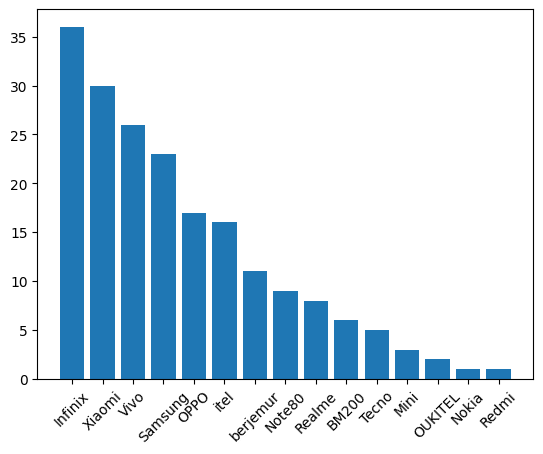

In [59]:
plt.bar(df_seller['Brand'], df_seller['Seller'])
plt.xticks(rotation=45)
plt.show()

Dapat dilihat bahwa brand terbanyak yang dijual di applikasi lazada pada halama 1 - 5 yatu Brand Infinix, No Brand, Xiaomi

### Kota yang banyak penjual product HP

In [60]:
df_location = df[['Seller', 'Location']].groupby(by=['Location']).count().reset_index().sort_values("Seller",ascending=True)
df_location

,Location,Seller
10,Kota Tasikmalaya,1
3,Kota Depok,10
8,Kota Kediri,11
2,Kota Bandung,12
9,Kota Surabaya,12
1,Kab. Tangerang,14
5,Kota Jakarta Pusat,16
6,Kota Jakarta Selatan,18
4,Kota Jakarta Barat,21
7,Kota Jakarta Utara,22


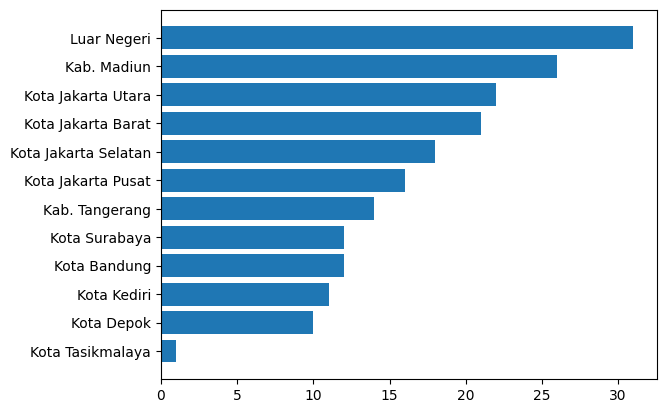

In [61]:
plt.barh(df_location['Location'], df_location['Seller'])
plt.show()

Dari total penjual pada applikasi lazada, paling banyak penjual dari Luar Negeri, Madiun, dan jakarta Utara


### Penjual menjual berapa brand HP, dan banyaknya product brand HP tersebut


In [62]:
df_seller = df[['Seller', 'Brand', 'Name']].groupby(by=['Seller', 'Brand']).size().reset_index(name='count').sort_values("Seller",ascending=True)
df_seller.head(20)

,Seller,Brand,count
0,1stLine,Vivo,1
1,36Shop,Infinix,4
2,Apollo Gadget Store,Realme,1
3,Aurora888,Redmi,1
4,BB Shop,Xiaomi,1
5,BTSnesia,Samsung,1
6,CC Shop,Vivo,1
7,Captain Gadget Store,OPPO,1
8,Cv.Garden Cell,Xiaomi,7
9,Cv.Garden Cell,itel,4


### Maximum, Minimum, and Average Prices

In [63]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
price_avg = df[['Brand','Price']].groupby(by=['Brand']).mean()
price_avg


,Price
Brand,
BM200,154355.000
Infinix,1530379.889
Mini,1873356.000
Nokia,1324000.000
Note80,618480.000
OPPO,3490016.235
OUKITEL,3553023.500
Realme,2559950.000
Redmi,980000.000


In [64]:
price_max = df[['Brand','Price']].groupby(by=['Brand']).max()
price_max

,Price
Brand,
BM200,155000.000
Infinix,2070000.000
Mini,1873356.000
Nokia,1324000.000
Note80,654470.000
OPPO,5990000.000
OUKITEL,4798891.000
Realme,2998000.000
Redmi,980000.000


In [65]:
price_min = df[['Brand','Price']].groupby(by=['Brand']).min()
price_min

,Price
Brand,
BM200,153710.000
Infinix,1175000.000
Mini,1873356.000
Nokia,1324000.000
Note80,594970.000
OPPO,1095000.000
OUKITEL,2307156.000
Realme,1999000.000
Redmi,980000.000


In [66]:
all_price = pd.merge(pd.merge(price_max, price_min, on='Brand'), price_avg, on='Brand')
new_name_kolom = {'Price_x' : 'Price_max', 'Price_y' : 'Price_min', 'Price' : 'Price_avg'}
all_price = all_price.rename(columns=new_name_kolom).reset_index()
all_price

,Brand,Price_max,Price_min,Price_avg
0,BM200,155000.000,153710.000,154355.000
1,Infinix,2070000.000,1175000.000,1530379.889
2,Mini,1873356.000,1873356.000,1873356.000
3,Nokia,1324000.000,1324000.000,1324000.000
4,Note80,654470.000,594970.000,618480.000
5,OPPO,5990000.000,1095000.000,3490016.235
6,OUKITEL,4798891.000,2307156.000,3553023.500
7,Realme,2998000.000,1999000.000,2559950.000
8,Redmi,980000.000,980000.000,980000.000
9,Samsung,7998000.000,504495.000,3265488.604


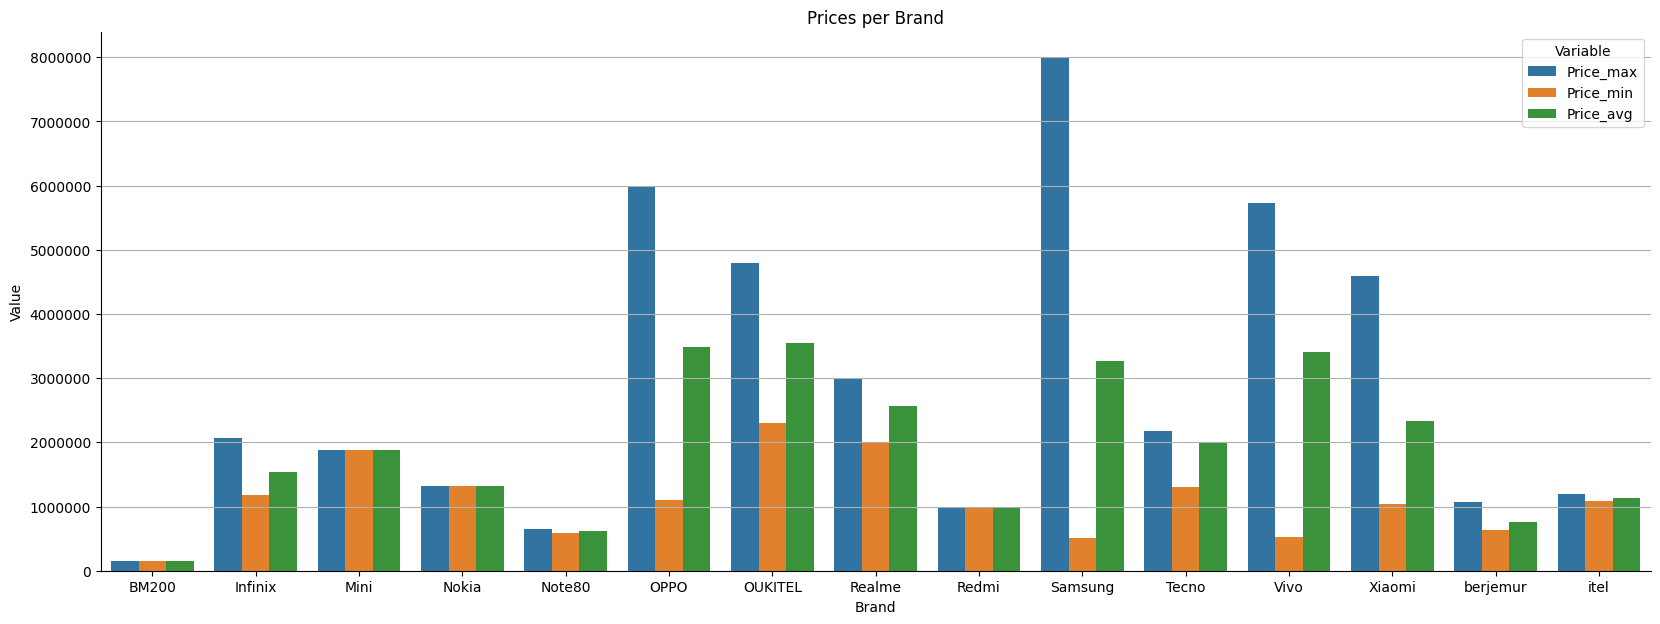

In [67]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
tidy = all_price.melt(id_vars='Brand').rename(columns=str.title)
sns.barplot(x='Brand', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.title('Prices per Brand')
sns.despine(fig)

Berdasrkan chart di atas dapat dilihat bahwa harga HP termahal yang sudah dan mendekai  nominal Rp 8.000.000 teridir dari Brand yang umum yaitu
1. Samssung
2. Oppo
3. Vivo

Sedangkan untuk harga hp terumah yang mendekati Rp 1.000.000 ataupun di bawah harga tersebut yitu
1. No Brand
2. Vivo
3. Samsung

Lalu untuk brand hp dengan harga setandar atau rata-rata dengan nominal harga mulai dari Rp 3.000.000 hingga Rp 5.000.000 (mulai dari yang paling mahal)
1. Oukitel
2. Oppo
3. Vivo
4. Samsung

tapi yang cukup menarik adalah hp denga harga rata - rata dari brand yang ternama seperti Samsung, Vivo, Oppo dengan mengeluarkan nominal yang kurang lebih sama kita dapat membeli hp yang "Termahal" dari brand seperti Oukitel, Xiaomi, dan Realme, sehingga kita dapat melakaukan analisis perbandingan lebih lanjut mengenai spesifikasi dan juga harga yang harus di keluarkan (price to performence)

### AVG Harga HP Termahal, AVG Harga HP Termurah, AVG Harga HP Standar / Rata - Rata


In [68]:
all_price_mean = all_price[['Price_max','Price_min','Price_avg']].mean()
all_price_mean

Price_max   2907981.133
Price_min   1104850.400
Price_avg   1930844.000
dtype: float64

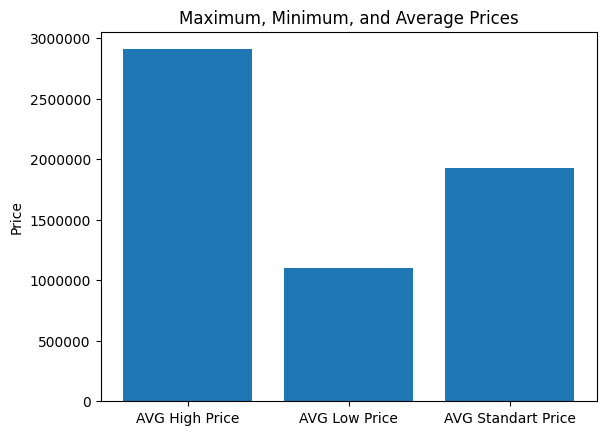

In [69]:
avg_all_price = {'Variable': ['AVG High Price', 'AVG Low Price', 'AVG Standart Price'],
            'Value': all_price_mean}
dt_vis_data = pd.DataFrame(avg_all_price)

# membuat bar plot
plt.ticklabel_format(style='plain', axis='y')
plt.bar(dt_vis_data['Variable'], dt_vis_data['Value'])
plt.ylabel('Price')
plt.title('Maximum, Minimum, and Average Prices')
plt.show()